In [1]:
from typing import List

import matplotlib.pyplot as plt

from Experiment import Experiment
from ExperimentalConfig import ExperimentalConfig
from elections.ElectionConstructor import ElectionConstructor, construct_irv, construct_h2h

def plot_results(results: List[List[float]], title: str, labels: List[str]):
    n_rows = 1
    n_cols = 1
    fig, axis = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 10))
    fig.suptitle(title, color="black", fontsize=22)
    fig.set_facecolor("white")

    count = 0
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    axis.tick_params(axis='x', colors="black")
    axis.tick_params(axis='y', colors="black")

    axis.hist(results, bins=30, label=labels)
    axis.legend()
    axis.set_xlabel("Sigma From Origin", fontsize=20)
    axis.set_ylabel("Frequency of Winner at Ideology", fontsize=20)

    plt.savefig("foo.png")

    0 w.ideology: 0.7294
  100 w.ideology: 0.4862
  200 w.ideology: 0.769
  300 w.ideology: -0.6295
  400 w.ideology: 0.5594
  500 w.ideology: 0.6378
  600 w.ideology: 0.4563
  700 w.ideology: 0.5831
  800 w.ideology: 0.2377
  900 w.ideology: 0.6189


2021-07-25 11:04:55.429528: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-07-25 11:04:55.599986: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


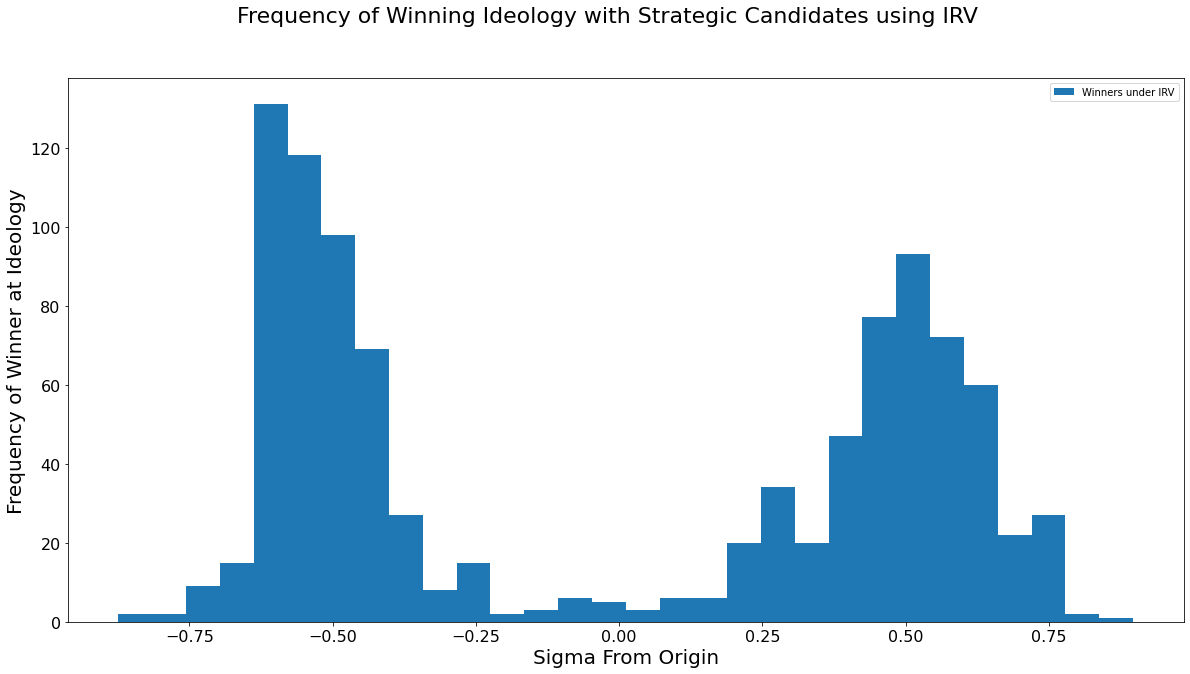

In [2]:
config = ExperimentalConfig(ElectionConstructor(construct_irv, "IRV"),
                            1.5, .7, 21, 512, 3, 100000, 2048, 400, 400, "exp/irv-1")
exp = Experiment(config)
irv_winners = exp.run_strategic_races(1000)
plot_results([irv_winners],
             "Frequency of Winning Ideology with Strategic Candidates using IRV",
             ["Winners under IRV"]
             )

    0 w.ideology: -0.01944
  100 w.ideology: 0.06525
  200 w.ideology: -0.1967
  300 w.ideology: 0.0123
  400 w.ideology: -0.0197
  500 w.ideology: -0.02123
  600 w.ideology: 0.3368
  700 w.ideology: 0.07978
  800 w.ideology: -0.05386
  900 w.ideology: -0.02993


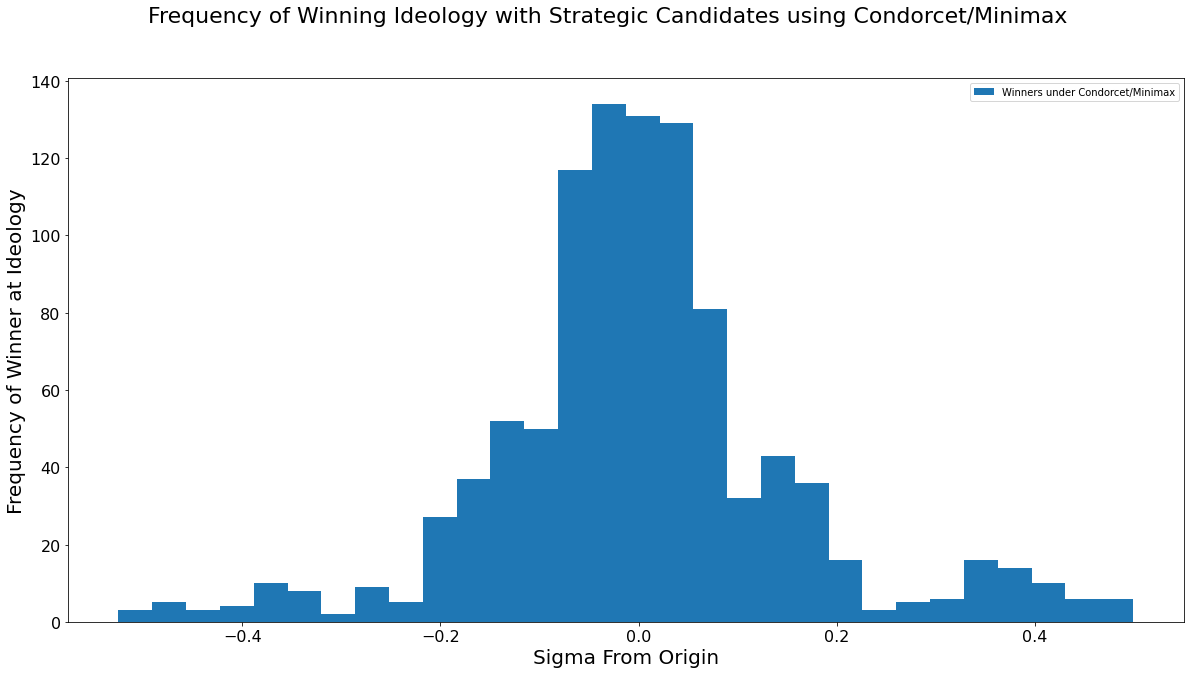

In [3]:
config = ExperimentalConfig(ElectionConstructor(construct_h2h, "H2H"),
                            1.5, .7, 21, 512, 3, 100000, 2048, 400, 400, "exp/h2h-1" )
exp = Experiment(config)
h2h_winners = exp.run_strategic_races(1000)
plot_results([h2h_winners],
             "Frequency of Winning Ideology with Strategic Candidates using Condorcet/Minimax",
             ["Winners under Condorcet/Minimax"]
             )